In [2]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

In [3]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [4]:
columns = ['TYPE', 'RA', 'DEC', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FIBERFLUX_G', 'FIBERFLUX_R', 'FIBERFLUX_Z', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'MASKBITS']

__g band problem__  
https://www.legacysurvey.org/viewer-dev/?ra=233.7187&dec=12.0846&layer=ls-dr9&zoom=12

In [5]:
cat = Table(fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/sweep/9.0/sweep-230p010-240p015.fits', columns=columns))
print(len(cat))

mask = (cat['NOBS_G']>=1) & (cat['NOBS_R']>=1) & (cat['NOBS_Z']>=1)
print(np.sum(mask), np.sum(mask)/len(mask))
cat = cat[mask]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cat['gmag'] = 22.5 - 2.5*np.log10(np.clip(cat['FLUX_G'], 1e-7, None))
    cat['rmag'] = 22.5 - 2.5*np.log10(np.clip(cat['FLUX_R'], 1e-7, None))
    cat['zmag'] = 22.5 - 2.5*np.log10(np.clip(cat['FLUX_Z'], 1e-7, None))
    cat['gfibermag'] = 22.5 - 2.5*np.log10(np.clip(cat['FIBERFLUX_G'], 1e-7, None))
    cat['rfibermag'] = 22.5 - 2.5*np.log10(np.clip(cat['FIBERFLUX_R'], 1e-7, None))
    cat['zfibermag'] = 22.5 - 2.5*np.log10(np.clip(cat['FIBERFLUX_Z'], 1e-7, None))

4200992
4200672 0.999923827515


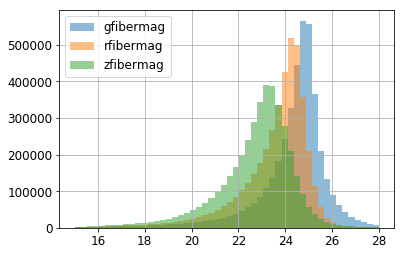

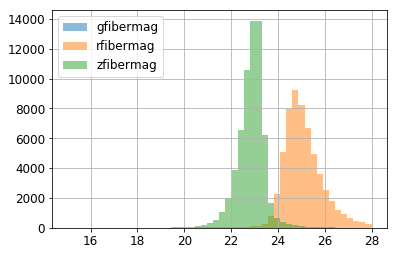

In [7]:
plt.hist(cat['gfibermag'], 50, range=(15, 28), alpha=0.5, label='gfibermag')
plt.hist(cat['rfibermag'], 50, range=(15, 28), alpha=0.5, label='rfibermag')
plt.hist(cat['zfibermag'], 50, range=(15, 28), alpha=0.5, label='zfibermag')
plt.legend(loc='upper left')
plt.grid()
plt.show()

mask = cat['FLUX_G']<0
plt.hist(cat['gfibermag'][mask], 50, range=(15, 28), alpha=0.5, label='gfibermag')
plt.hist(cat['rfibermag'][mask], 50, range=(15, 28), alpha=0.5, label='rfibermag')
plt.hist(cat['zfibermag'][mask], 50, range=(15, 28), alpha=0.5, label='zfibermag')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [23]:
mask = cat['FLUX_G']<=0
print(np.sum(mask))
mask &= (cat['rfibermag']<22.5) & (cat['zfibermag']<22.5)
# mask &= (cat['rfibermag']<22.5)
# mask &= (cat['NOBS_Z']>=2)
print(np.sum(mask))

# maskbits = [1, 5, 6, 7, 11, 12, 13]
maskbits = [1, 5, 6, 7, 12, 13]
mask_clean = np.ones(len(cat), dtype=bool)
for bit in maskbits:
    mask_clean &= (cat['MASKBITS'] & 2**bit)==0
mask &= mask_clean
print(np.sum(mask))

64006
172
130


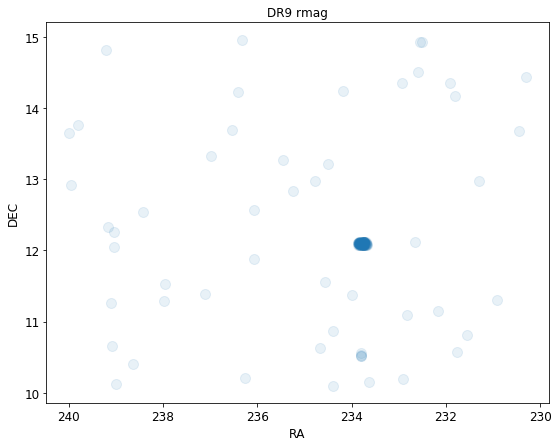

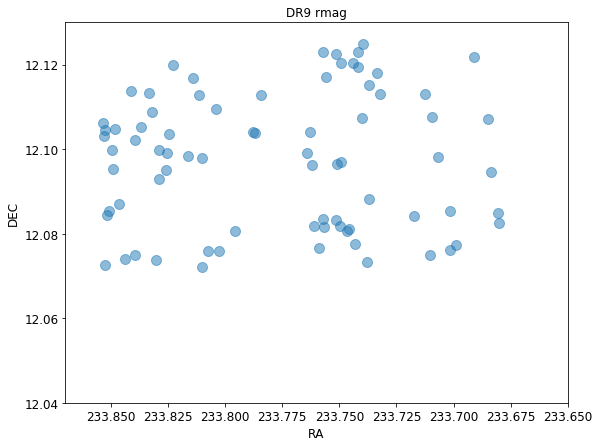

In [24]:
plt.figure(figsize=(9, 7))
plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=20, alpha=0.1)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('DR9 rmag')
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(9, 7))
plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=20, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('DR9 rmag')
plt.axis([233.87, 233.65, 12.04, 12.13])
# plt.gca().invert_xaxis()
plt.show()

In [25]:
t = Table()
t['RA'] = cat['RA'][mask]
t['DEC'] = cat['DEC'][mask]
t.write('visual_inspection_g_1.fits', overwrite=True)

In [26]:
cat[mask]

TYPE,RA,DEC,FLUX_G,FLUX_R,FLUX_Z,NOBS_G,NOBS_R,NOBS_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,MASKBITS,gmag,rmag,zmag,gfibermag,rfibermag,zfibermag
bytes3,float64,float64,float32,float32,float32,int16,int16,int16,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32
PSF,238.984735704,10.1144090477,-1.18198,2.53439,15.3576,3,4,4,0.0,1.97056,11.941,0,40.0,21.4903,19.5342,40.0,21.7635,19.8074
REX,239.045465392,12.2645730268,-0.821645,3.40971,16.8732,2,2,2,0.0,2.37902,11.7728,2064,40.0,21.1682,19.432,40.0,21.559,19.8228
PSF,237.950158479,11.5283212764,-0.423686,5.74198,17.689,3,3,3,0.0,4.46987,13.7701,0,40.0,20.6023,19.3807,40.0,20.8743,19.6527
REX,238.424881006,12.5427703601,-0.515639,2.56712,8.05109,4,4,4,0.0,1.41627,4.44176,0,40.0,21.4764,20.2354,40.0,22.1221,20.8811
SER,238.643285362,10.3981675055,-23.4867,61.8436,229.742,4,5,5,0.0,3.33716,12.3972,28,40.0,18.0218,16.5969,40.0,21.1916,19.7667
PSF,234.566215529,11.5560904007,-2.2139,9.24389,53.6087,3,3,5,0.0,7.18703,41.6802,2064,40.0,20.0854,18.1769,40.0,20.3586,18.4502
DEV,234.17907395,14.2430375458,-0.0617856,2.38091,6.76687,3,3,3,0.0,1.45825,4.14455,0,40.0,21.5581,20.424,40.0,22.0904,20.9563
PSF,234.491881155,13.2212613157,-0.151989,1.97476,23.7315,3,3,3,0.0,1.53482,18.4446,2064,40.0,21.7612,19.0617,40.0,22.0349,19.3353
PSF,234.392762725,10.8601901462,-2.13639,18.0389,181.335,3,2,3,0.0,14.0478,141.215,2064,40.0,19.3595,16.8538,40.0,19.631,17.1253


In [27]:
t = Table()
# t['type'], t['counts'] = np.unique(cat['TYPE'], return_counts=True)
# t['frac (%)'] = t['counts']/len(cat)*100
t['type'], t['counts'] = np.unique(cat['TYPE'][mask], return_counts=True)
t['frac (%)'] = t['counts']/np.sum(mask)*100
t['frac (%)'].format = '%.1f'
t.sort('counts')
t

type,counts,frac (%)
bytes3,int64,float64
SER,8,6.2
EXP,9,6.9
DEV,14,10.8
REX,14,10.8
PSF,85,65.4


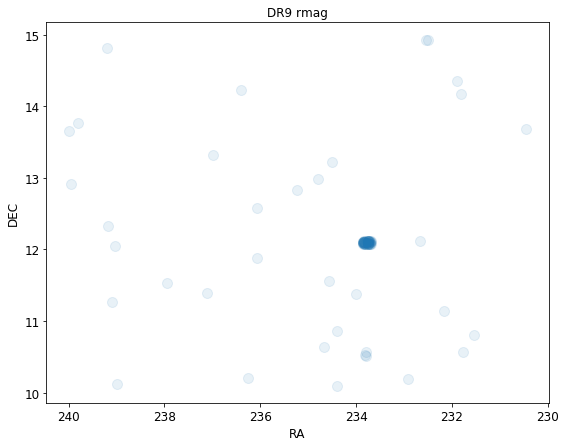

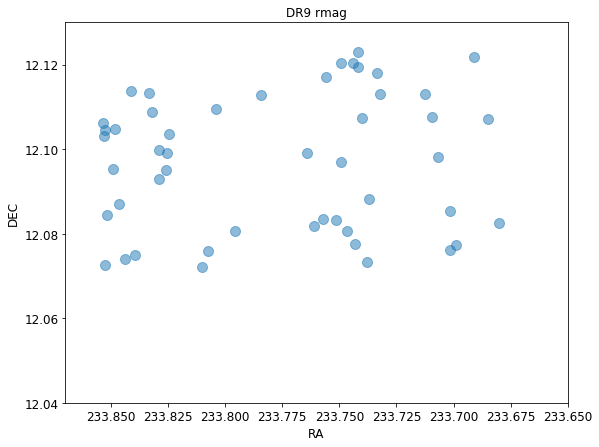

In [28]:
mask &= cat['TYPE']=='PSF'

plt.figure(figsize=(9, 7))
plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=20, alpha=0.1)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('DR9 rmag')
plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(9, 7))
plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=20, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('DR9 rmag')
plt.axis([233.87, 233.65, 12.04, 12.13])
# plt.gca().invert_xaxis()
plt.show()